<a href="https://colab.research.google.com/github/ThongTao2310/Term-Project-2025/blob/main/Kaggle_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("zahrazolghadr/bank-loan")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bank-loan


In [58]:
import os

# List all files inside the downloaded dataset folder
os.listdir(path)

['Bankloan.txt']

In [59]:
df.columns


Index(['age,ed,employ,address,income,debtinc,creddebt,othdebt,default'], dtype='object')

In [54]:
print(df.columns.tolist())


['age,ed,employ,address,income,debtinc,creddebt,othdebt,default']


In [60]:
# Overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 1 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   age,ed,employ,address,income,debtinc,creddebt,othdebt,default  700 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [61]:
df = pd.read_csv(os.path.join(path, 'Bankloan.txt'))
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17,12,176.0,9.3,11.359392,5.008608,1
1,27.0,1.0,10,6,31.0,17.3,1.362202,4.000798,0
2,40.0,1.0,15,7,NaN,5.5,0.856075,2.168925,0
3,41.0,NaN,15,14,120.0,2.9,2.658720,0.821280,0
4,24.0,2.0,2,0,28.0,17.3,1.787436,3.056564,1


In [62]:
# Count missing values per column
df.isnull().sum()


,0
age,19
ed,20
employ,0
address,0
income,37
debtinc,0
creddebt,0
othdebt,0
default,0


In [63]:
# Identify categorical vs. numerical
df.dtypes.value_counts()



,count
float64,6
int64,2
object,1


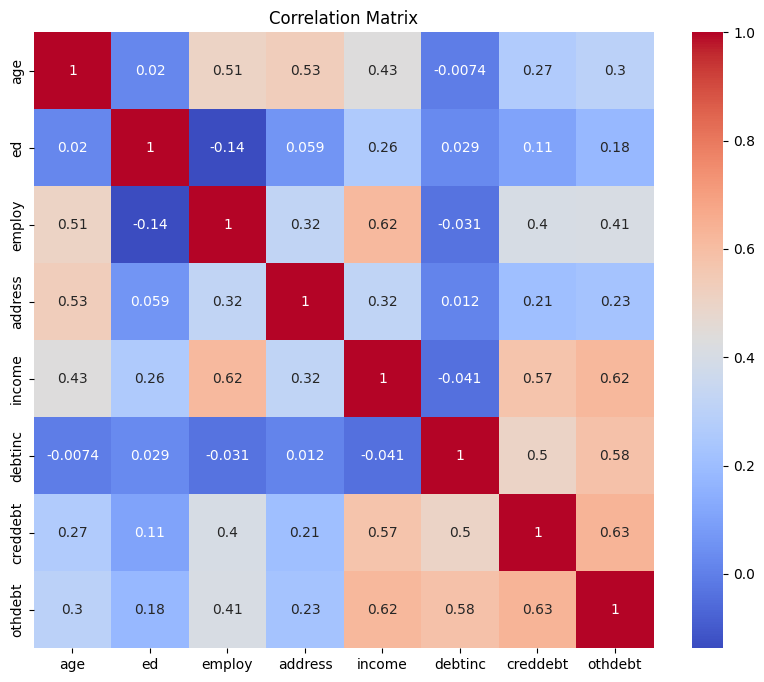

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


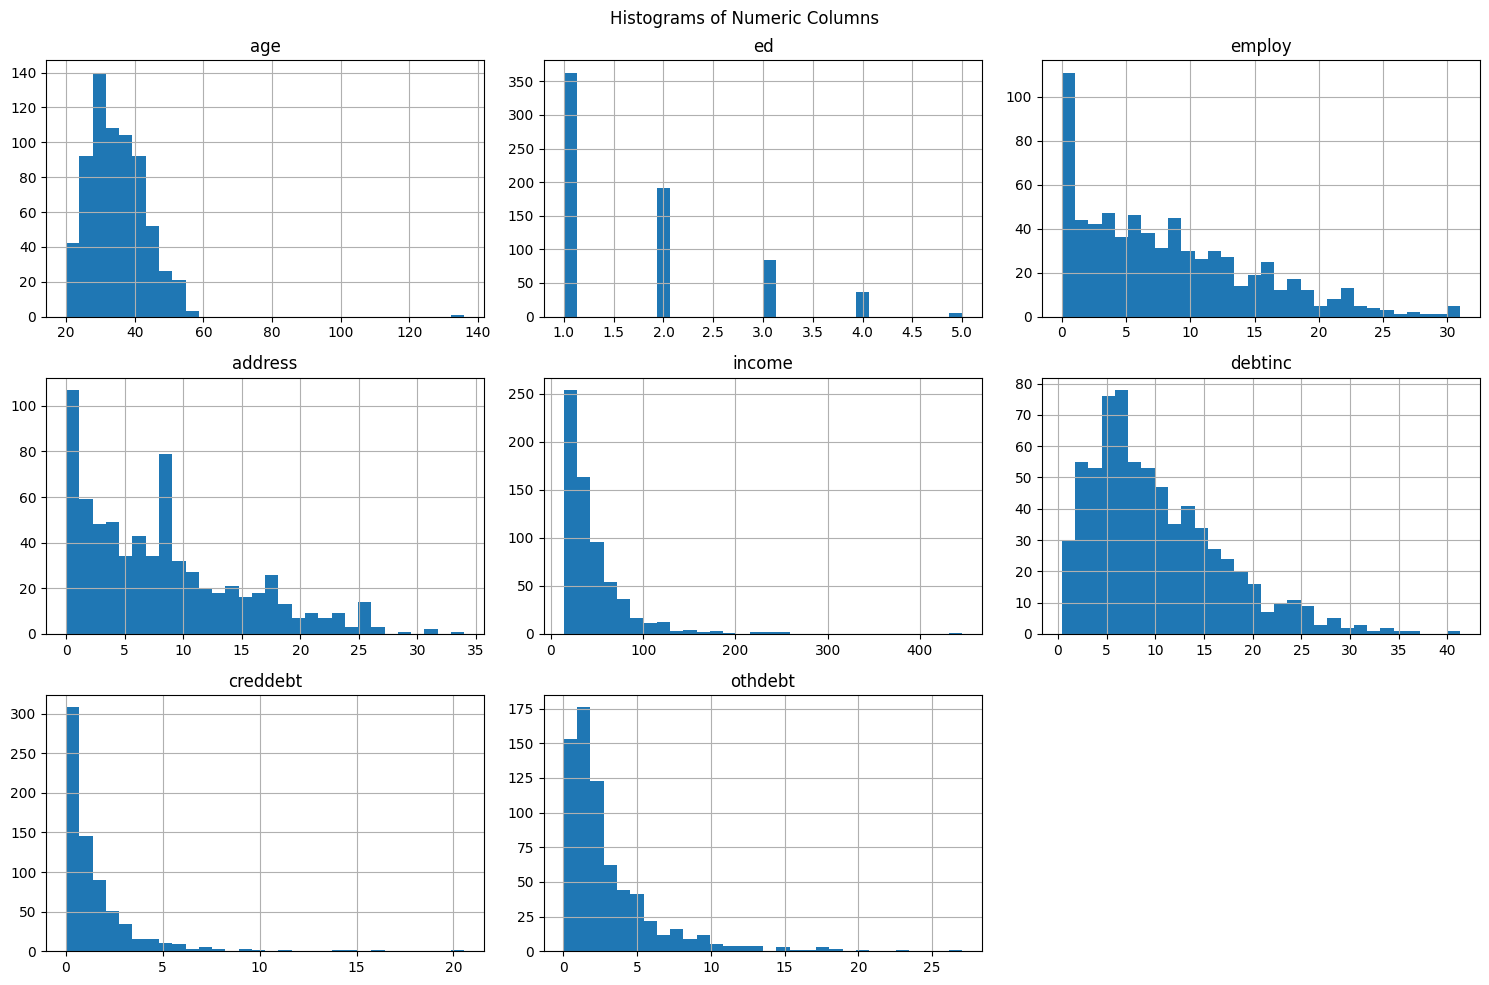

In [65]:
df.hist(figsize=(15,10), bins=30)
plt.suptitle('Histograms of Numeric Columns')
plt.tight_layout()
plt.show()


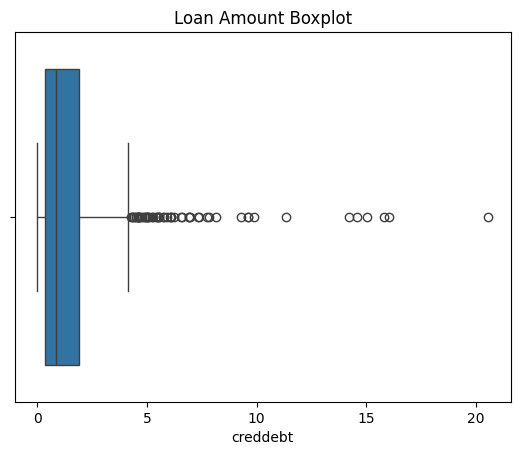

In [66]:
sns.boxplot(x='creddebt', data=df)
plt.title('Loan Amount Boxplot')
plt.show()


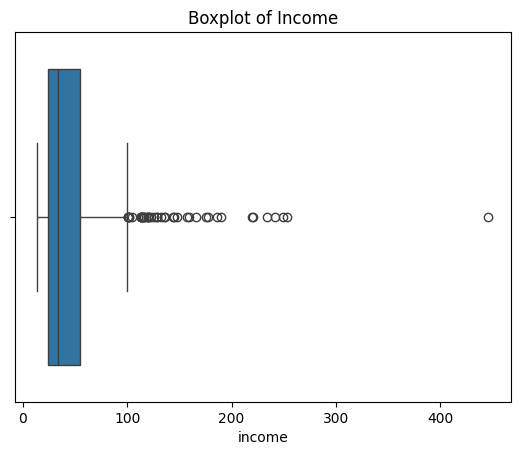

In [89]:
sns.boxplot(x=df['income'])
plt.title('Boxplot of Income')
plt.show()


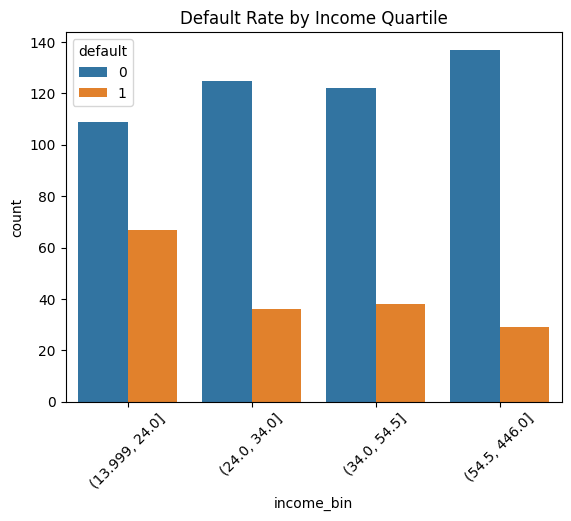

In [91]:
df['income_bin'] = pd.qcut(df['income'], q=4)
sns.countplot(x='income_bin', hue='default', data=df)
plt.title('Default Rate by Income Quartile')
plt.xticks(rotation=45)
plt.show()


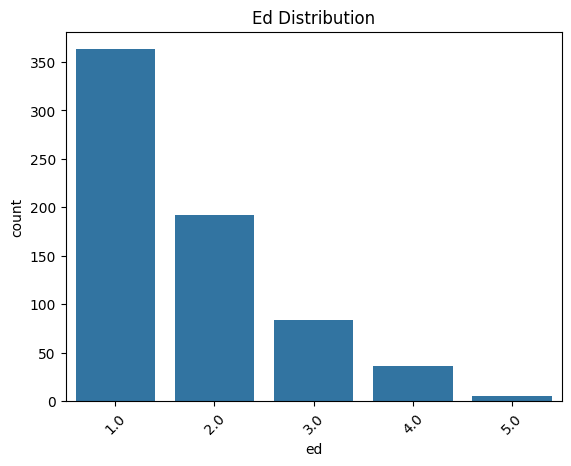

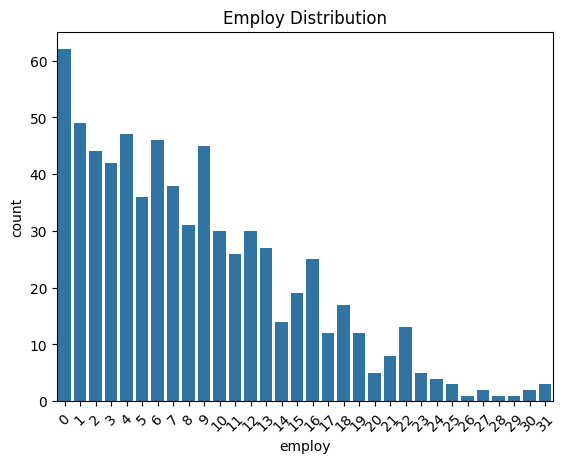

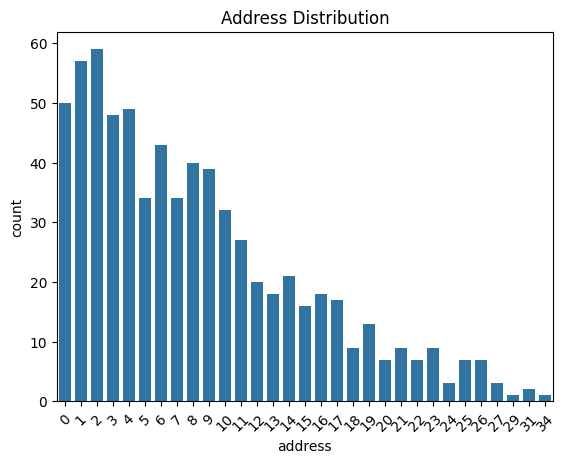

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['ed', 'employ', 'address']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xticks(rotation=45)
    plt.show()


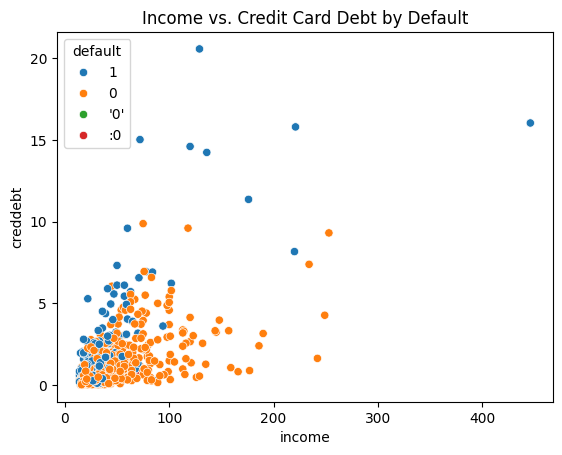

In [68]:
sns.scatterplot(x='income', y='creddebt', hue='default', data=df)
plt.title('Income vs. Credit Card Debt by Default')
plt.show()


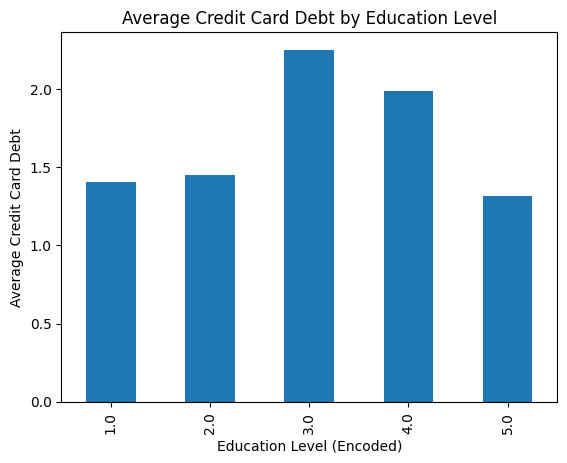

In [69]:
df.groupby('ed')['creddebt'].mean().plot(kind='bar')
plt.title('Average Credit Card Debt by Education Level')
plt.xlabel('Education Level (Encoded)')
plt.ylabel('Average Credit Card Debt')
plt.show()


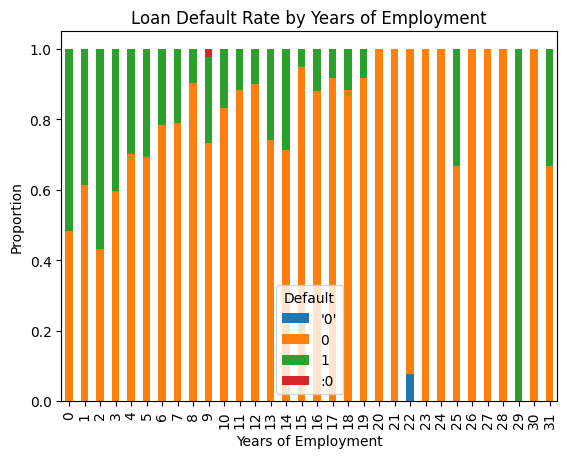

In [70]:
default_rate = pd.crosstab(df['employ'], df['default'], normalize='index')
default_rate.plot(kind='bar', stacked=True)
plt.title('Loan Default Rate by Years of Employment')
plt.xlabel('Years of Employment')
plt.ylabel('Proportion')
plt.legend(title='Default')
plt.show()


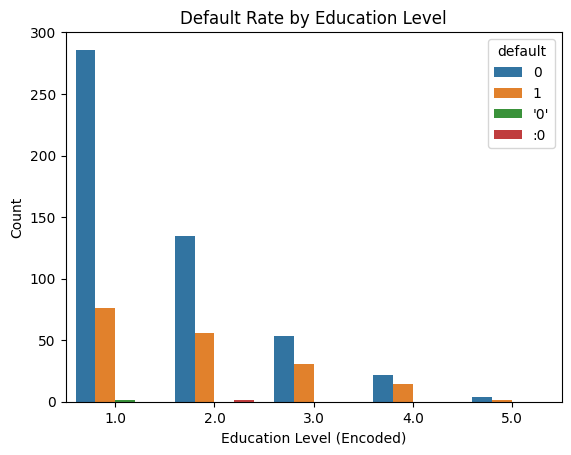

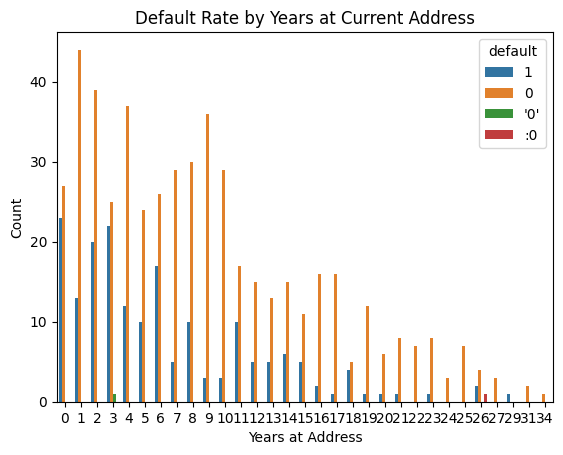

In [44]:
sns.countplot(x='ed', hue='default', data=df)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level (Encoded)')
plt.ylabel('Count')
plt.show()

sns.countplot(x='address', hue='default', data=df)
plt.title('Default Rate by Years at Current Address')
plt.xlabel('Years at Address')
plt.ylabel('Count')
plt.show()


In [71]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("zahrazolghadr/bank-loan")
print("Path to dataset files:", path)







Path to dataset files: /kaggle/input/bank-loan


In [14]:
import pandas as pd

# Load the dataset (likely tab-delimited, since it's .txt)
df = pd.read_csv(path + '/Bankloan.txt', delimiter='\t')

# Confirm it loaded correctly
df.head()


,"age,ed,employ,address,income,debtinc,creddebt,othdebt,default"
0,"41,3,17,12,176.000000,9.300000,11.359392,5.008..."
1,"27,1,10,6,31.000000,17.300000,1.362202,4.000798,0"
2,"40,1,15,7,,5.500000,0.856075,2.168925,0"
3,"41,,15,14,120.000000,2.900000,2.658720,0.821280,0"
4,"24,2,2,0,28.000000,17.300000,1.787436,3.056564,1"


In [15]:
df.isnull().sum()


,0
"age,ed,employ,address,income,debtinc,creddebt,othdebt,default",0


In [16]:
df = df.dropna()


In [17]:
df.dtypes


,0
"age,ed,employ,address,income,debtinc,creddebt,othdebt,default",object


In [74]:
from sklearn.preprocessing import StandardScaler

X = df.drop('default', axis=1)
y = df['default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
y.value_counts()



,count
default,
0,515
1,183
'0',1
:0,1


In [78]:
# Step 1: Clean target column
df['default'] = df['default'].astype(str).str.extract('(\d)').astype(int)

# Step 2: Confirm cleanup
print(df['default'].value_counts())


default
0    517
1    183
Name: count, dtype: int64


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('default', axis=1)
y = df['default']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


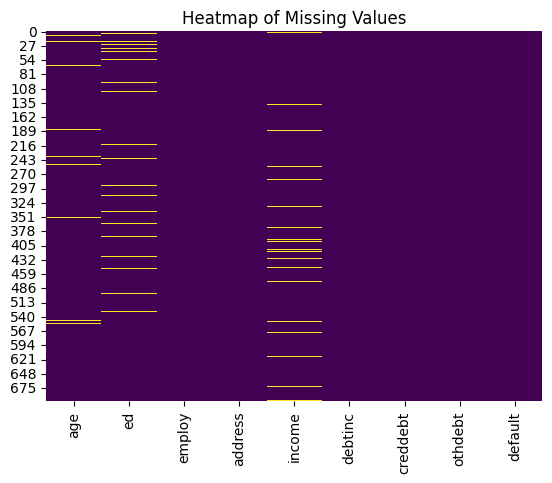

In [82]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [93]:
# Remove top 1% extreme outliers
q99 = df['income'].quantile(0.99)
df = df[df['income'] <= q99]




In [94]:
df['creddebt'] = df['creddebt'].clip(upper=df['creddebt'].quantile(0.95))
df['othdebt'] = df['othdebt'].clip(upper=df['othdebt'].quantile(0.95))


In [95]:
# Replace negative or suspicious values
df['employ'] = df['employ'].clip(lower=0)


In [96]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 0


In [ ]:
## Predictive Modeling

I apply two supervised learning algorithms to predict whether a loan applicant will default:

- **Logistic Regression** – a linear, interpretable baseline.
- **Random Forest Classifier** – a non-linear ensemble method.

I'll compare their performance using metrics such as accuracy, precision, recall, F1 score, and ROC AUC.


In [118]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(X_train_imputed, y_train)
lr_preds = lr_model.predict(X_test_imputed)


In [112]:
import numpy as np


In [113]:
print(np.isnan(X_train_imputed).sum())
print(np.isnan(X_test_imputed).sum())


0
0


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 2. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# 3. Train logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# 4. Print results
print("Logistic Regression Results")
print(classification_report(y_test, lr_preds))
print("ROC AUC Score:", roc_auc_score(y_test, lr_preds))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       103
           1       0.70      0.62      0.66        37

    accuracy                           0.83       140
   macro avg       0.78      0.76      0.77       140
weighted avg       0.82      0.83      0.83       140

ROC AUC Score: 0.7622671214904224


In [121]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

print("\n🔹 Random Forest Results")
print(classification_report(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_preds))


🔹 Random Forest Results
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       103
           1       0.76      0.59      0.67        37

    accuracy                           0.84       140
   macro avg       0.81      0.76      0.78       140
weighted avg       0.84      0.84      0.84       140

ROC AUC: 0.7633167147730255
